In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [20]:
data = pd.read_csv('./Flight.csv', encoding = 'euc-kr')

In [6]:
print(data.columns)
display(data.head())

Index(['선택한 날짜', '항공사', '출발시간', '출발공항', '도착시간', '도착공항', '운행정보1', '운행정보2',
       '가격'],
      dtype='object')


,선택한 날짜,항공사,출발시간,출발공항,도착시간,도착공항,운행정보1,운행정보2,가격
0,20230725,캐세이퍼시픽항공,12:45,CDG,19:15,ICN,경유 1,23시간 30분,1099400
1,20230725,캐세이퍼시픽항공,12:45,CDG,21:15,ICN,경유 1,25시간 30분,1099400
2,20230725,베트남항공,13:10,CDG,16:25,ICN,경유 1,20시간 15분,1314809
3,20230725,베트남항공,13:10,CDG,6:40,ICN,경유 1,34시간 30분,1315775
4,20230725,중국동방항공,21:20,CDG,11:55,ICN,경유 1,31시간 35분,1326700


# 항공권 가격 예측 모델 시나리오
- 프로젝트 1차 목표는 여행 기간과 목적지를 선택했을 때 최소한의 선택을 바탕으로 대략적인 예산을 알려주는 것이며, 
  소비자의 추가적인 결정에 따라 자세한 항공권 정보와 호텔 정보를 제공하는 서비스를 기획했다.

- 일반적으로 여행 계획시, 처음부터 상세하게 일정과 비용을 계획하기 보단, 여행 기간과 여행지를 설정하고 대략적인 예산을 현재 상황과 맞춰보는 것으로 시작한다.  
- 보다 정확한 가격을 예측하는 것도 중요하지만, 단순 클릭 몇번으로도 고객이 설정한 예산과 비교해볼 수 있는 간편한 서비스를 제공하기 위해, 최소한의 데이터 특성으로 비교적 정확한 예측 모델을 만드는 것에 초점을 두었다.

- 다음과 같이 참고 사이트를 접속해보면 항공권 가격을 확인하기 위해 가장 중요하면서도 기본적인 정보를 입력해주어야 하는데,  
바로, `날짜`, `출발 지역`, `도착 지역`에 대한 정보이다.

#### `※ 참고 : 네이버 항공권 사이트` (https://flight.naver.com/)  
  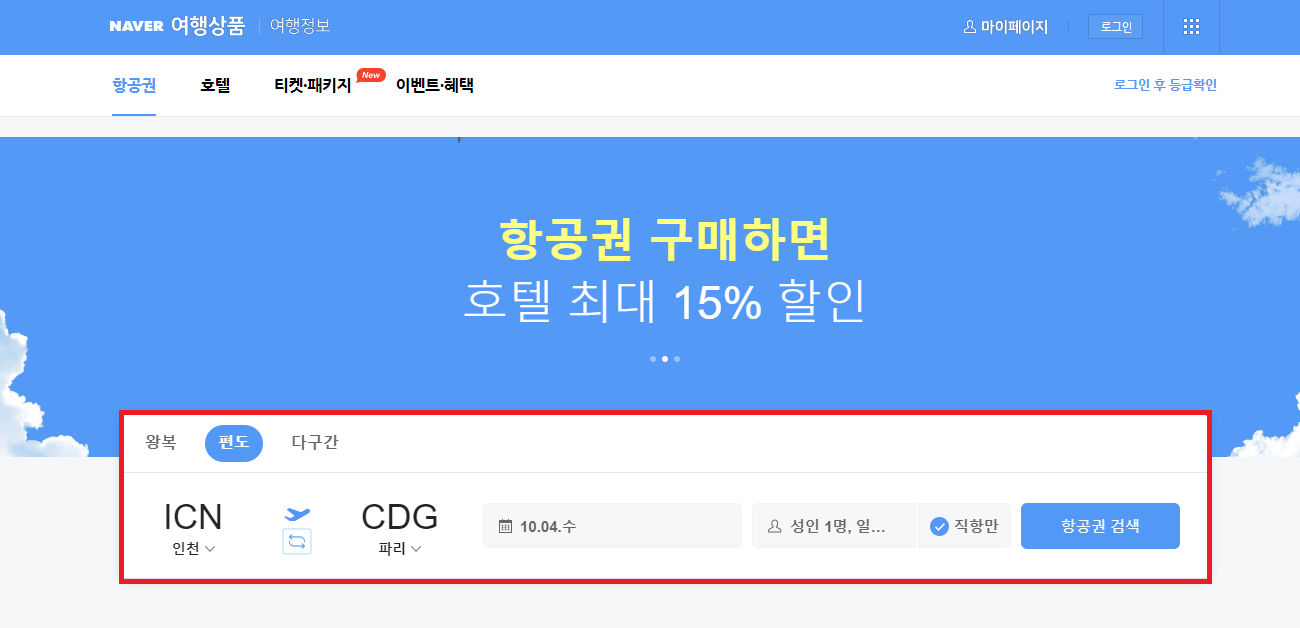  

- 가격 데이터를 분석하고 정확히 예측하는 것 자체가 목표라면 추가적인 특징(항공사, 경유 횟수, 탑승 시간, 좌석 등급, 출발 및 도착 시간 등)을 수집하는 것이 필요하겠지만, 위에서 언급했듯이 고객에게 `'대략적인'`예산을 쉽게 제공하기 위해 소비자가 입력하는 정보만을 활용하는 예측 모델을 구축하였다.

- 수집한 데이터는 네이버 항공권 데이터로 수집 시작일을 기점으로 2023.07.25 ~ 2023.12.31, 약 5개월의 데이터(90856 데이터 샘플)를 수집하였다.  

#### 수집 데이터  
  
| No. | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| Feature Name | 선택한 날짜 | 항공사 | 출발시간 | 출발공항 | 도착시간 | 도착공항 | +1일 | 운행정보1 | 운행정보2 | 편도 | 가격 | 
| Ex. | 20230725 | 에어프랑스 | 17:50 | CDG | 12:10 | ICN | +2일 | 경유1 | 35시간 20분 | 편도 | 2268600 |

#### 특징 설명  
1. 선택한 날짜 (int) : 출발 일자  
2. 항공사 (object) : 해당 항공 운행하는 항공사명  
3. 출발시간 (object) : 항공 출발 시간  
4. 출발공항 (object) : 출발 지역의 IATA 공항코드 (세 문자 형식의 코드)
5. 도착시간 (object) : 항공 도착 시간
6. 도착공항 (object) : 도착 지역의 IATA 공항코드 (세 문자 형식의 코드)
7. +1일 (object) : 출발일자를 기준으로 몇일 뒤 도착하는지
8. 운행정보1 (object) : 직항 또는 경유(경유횟수) 정보
9. 운행정보2 (object) : 도착까지 소요되는 시간
10. 편도 (object) : 편도 여부
11. 가격 (object) : 항공권 가격(원)


# 데이터 시각화

In [ ]:
data['선택한 날짜'].to_dat

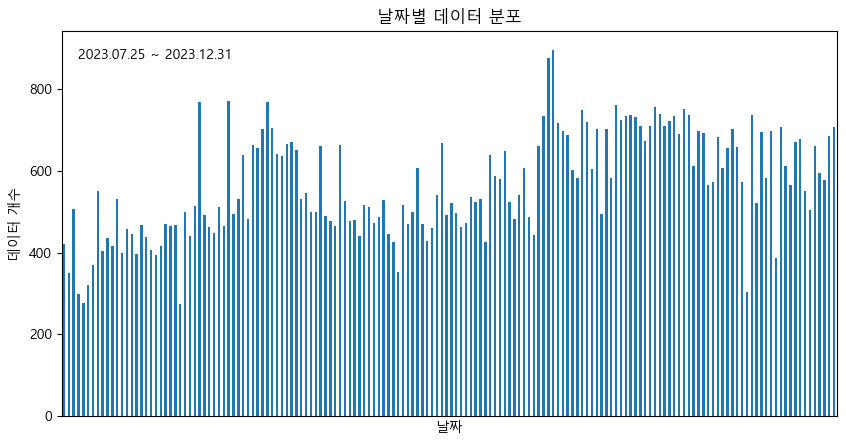

In [20]:
# 날짜별 데이터 분포
date_counts = pd.to_datetime(data['선택한 날짜'], format='%Y%m%d').value_counts().sort_index()
plt.figure(figsize=(10,5))
date_counts.plot(kind='bar')
plt.xticks([])
plt.xlabel('날짜')
plt.ylabel('데이터 개수')
plt.title('날짜별 데이터 분포')

plt.text(-0.06, 0.87, '2023.07.25 ~ 2023.12.31',
         horizontalalignment='left',
         verticalalignment='center',
         transform=ax.transAxes,
         fontsize=10)
plt.show()

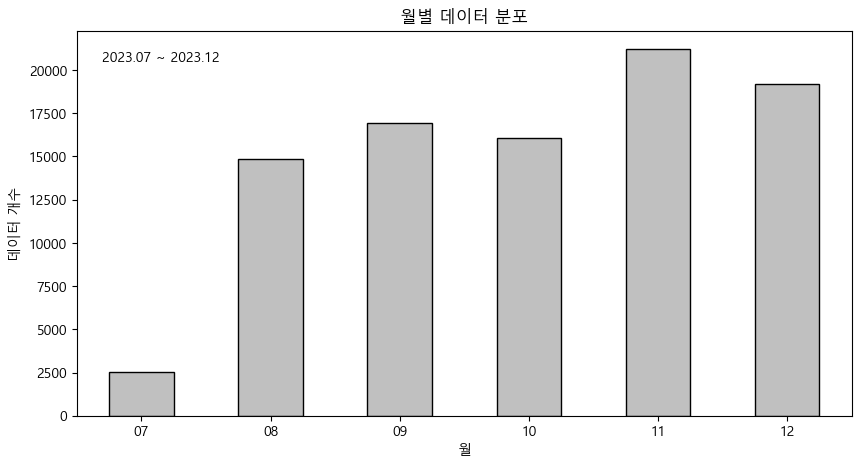

In [44]:
# 월별 데이터 분포
date_counts = data['선택한 날짜'].astype('str').str[4:6].value_counts().sort_index()
plt.figure(figsize=(10,5))
date_counts.plot(kind='bar',color='#C0C0C0', edgecolor='black', linewidth=1)
# plt.xticks([])
plt.xlabel('월')
plt.ylabel('데이터 개수')
plt.title('월별 데이터 분포')
plt.xticks(rotation=0)
plt.text(-0.03, 0.92, '2023.07 ~ 2023.12',
         horizontalalignment='left',
         verticalalignment='center',
         transform=ax.transAxes,
         fontsize=10)
plt.show()

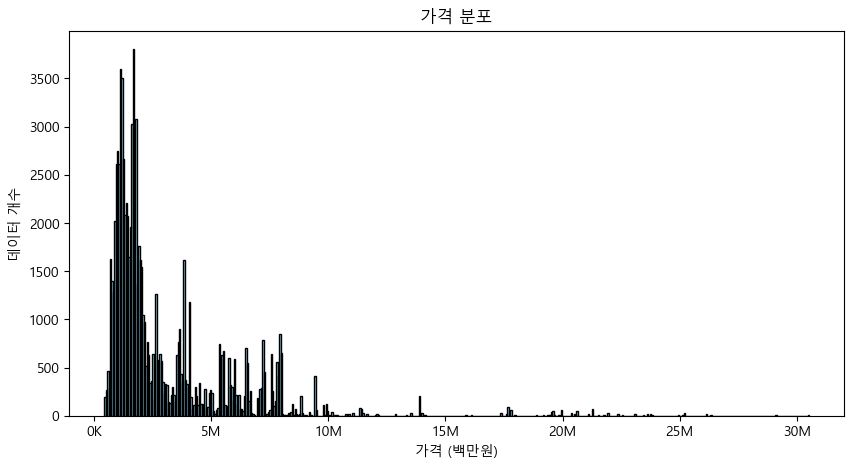

In [53]:
# 가격 분포
'''
프리미엄, 비즈니스, 일등석이 아닌 일반석 데이터를 수집했는데 가격이 500만원이 넘어가는 것이 이해가지 않았음.
네이버 항공권 사이트에 해당사항을 물어보고 싶으나 네이버는 여러 회사와 제휴를 맺고 중개하기 때문에 문의를 넣기가 어려웠음.
'''

plt.figure(figsize=(10, 5))
data['가격'].plot(kind='hist', bins=500, color='skyblue', edgecolor='black', linewidth=1.0)

# 백만원 단위로 표시하는 함수 정의
def format_func(value, tick_number):
    if value >= 1e6:
        return f"{int(value / 1e6)}M"
    else:
        return f"{int(value / 1e4)}K"

# x축 눈금에 백만원 단위로 표시 적용
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.xlabel('가격 (백만원)')
plt.ylabel('데이터 개수')
plt.title('가격 분포')
plt.show()

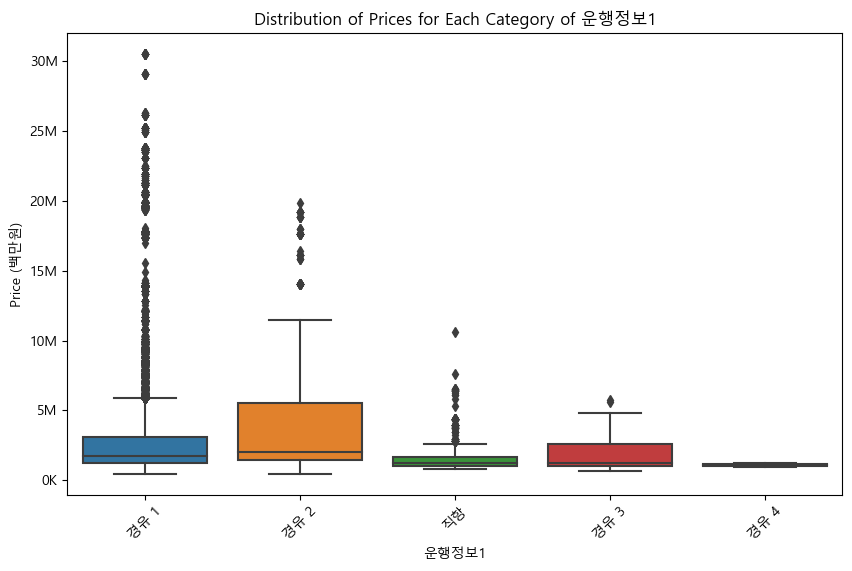

In [55]:
# 운행 정보 별 가격 분포
'''
이 시각화 자료를 확인 후, 납득할 수 있는 데이터를 추출하여 예측 모델에 사용할 것을 제안하는 바이다.
좌석 등급이 동일하다고 가정한다면, 직항 항공 보다 비싼 경유 항공은 고객 입장에서 매력이 떨어지는 서비스이다.
저가로 항공을 이용하기 위해 경유 항공을 선택하는 것은 납득 가능하나, 굳이 비싼 비용을 지불하며 직항 대신 경유를 이용할 이유는 없어보인다.
또한, 일반석의 비용이 3천만원까지 올라가는 것은 납득하기 어렵다.
따라서 전처리 단계에서 날짜별 직항 항공권 최소 가격보다 저렴한 가격의 경유 항공 데이터만 추출하여 학습에 이용하였다.
'''
plt.figure(figsize=(10, 6))
sns.boxplot(x='운행정보1', y='가격', data=data)
plt.title('Distribution of Prices for Each Category of 운행정보1')
plt.xlabel('운행정보1')
plt.ylabel('Price (백만원)')

# 백만원 단위로 표시하는 함수 정의
def format_func(value, tick_number):
    if value >= 1e6:
        return f"{int(value / 1e6)}M"
    else:
        return f"{int(value / 1e4)}K"

# y축 눈금에 백만원 단위로 표시 적용
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.xticks(rotation=45)
plt.show()

In [15]:
# 데이터 전처리
'''
1. 비용 분포를 고려하여 데이터 추출
2. 요일 별 가격 비교를 위해 새로운 feature 생성
3. 저렴하게 항공권을 구하려면 3개월 이전에 구입하라는 얘기를 자주 들어와서 해당 사항 파악을 위해 feature 생성
4. 출발 시간대가 가격에 영향을 미치는지 파악
'''
# 날짜 데이터 변환 및 년/월/일 분류
data['선택한 날짜'] = pd.to_datetime(data['선택한 날짜'], format='%Y%m%d')
data['년'] = data['선택한 날짜'].dt.year
data['월'] = data['선택한 날짜'].dt.month
data['일'] = data['선택한 날짜'].dt.day
# 요일 정보 추가
data['요일'] = data.apply(lambda x: datetime.date(x['년'], x['월'], x['일']).weekday(), axis=1)
# 3개월 후 여행을 계획하는지
'''가설 : 티켓팅을 빠르게 할 수록 저렴하게 여행이 가능하다'''
today = datetime.datetime.today().date()
target_date = today + datetime.timedelta(days=90)
data['3개월'] = (data['선택한 날짜'].dt.date >=target_date).astype(int)
# 출발 시간대 정보 추가
'''
네이버 항공권 사이트에선 출발 시각을 7가지로 분류 
0 : 새벽 (00:00 ~ 06:00)
1 : 오전 (06:00 ~ 09:00)
2 : 오전 (09:00 ~ 12:00)
3 : 오후 (12:00 ~ 15:00)
4 : 오후 (15:00 ~ 18:00)
5 : 저녁 (18:00 ~ 21:00)
6 : 저녁 (21:00 ~ 00:00)
'''
def time_func(x):
    temp = int(x.split(':')[0])
    if temp < 6: return 0
    elif temp < 9: return 1
    elif temp < 12: return 2
    elif temp < 15: return 3
    elif temp < 18: return 4
    elif temp < 21: return 5
    else : return 6
data['출발시간대'] = data['출발시간'].apply(time_func)

# 가독성 위해 컬럼명 변경
data = data.rename(columns={'운행정보1':'직항여부'})
# 직항 여부 binary 데이터 변경
'''
0 : 경유 (횟수 관계 없이)
1 : 직항
'''
data['직항여부'] = data['직항여부'].apply(lambda x: 1 if x =='직항' else 0)
# 데이터 추출
preprocessed_data = pd.DataFrame()
for date in data['선택한 날짜'].unique():
    condition_0 = (data['선택한 날짜']==date) & (data['직항여부'] == 0)
    condition_1 = (data['선택한 날짜']==date) & (data['직항여부'] == 1)
    filtered_data_1 = data.loc[condition_1]
    min_price = min(filtered_data_1['가격'])
    filtered_data_0 = data.loc[condition_0]
    filtered_data_0 = filtered_data_0[filtered_data_0['가격'] < min_price]
    preprocessed_data = pd.concat([preprocessed_data,filtered_data_0, filtered_data_1])


ValueError: min() arg is an empty sequence

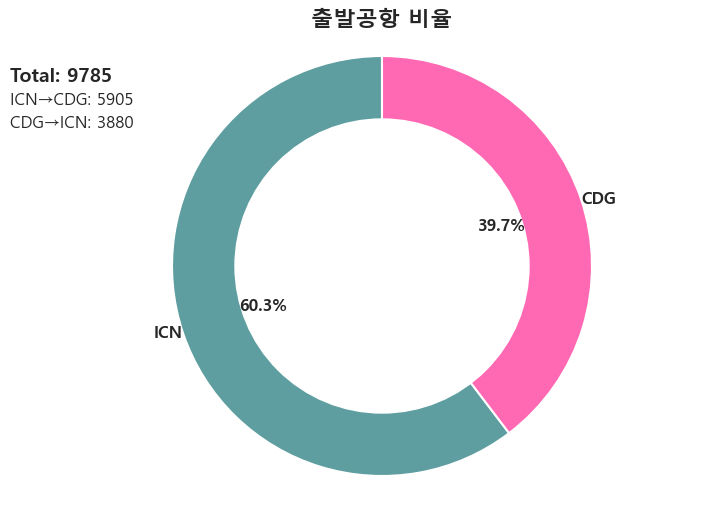

In [91]:
# 전처리 후 출발 공항의 데이터 비율 
'''
현재 프로젝트에서 설정한 여행지는 프랑스이며, 공항은 샤를드골 공항(CDG)을 설정했기 때문에, 
출발 공항과 도착 공항을 모두 feature로 사용 및 One-hot encoding을 수행할 필요가 없다고 판단
따라서 binary type의 출국 여부 feature를 만들어 쓸데 없이 데이터 차원 증가 시키는 것 방지.
다양한 지역 및 국가를 대상으로 서비스가 수행된다면 One-hot encoding을 활용할 필요가 있음.
'''
ratio = preprocessed_data['출발공항'].value_counts(normalize=True)

labels = ['ICN', 'CDG']
# 색상 설정
colors = ['#5F9EA0', '#FF69B4']

plt.figure(figsize=(8, 6))

# 데이터 그룹별 색상 설정
colors = ['#5F9EA0', '#FF69B4']

# 파이차트 그리기
wedgeprops = {'linewidth': 1.5, 'edgecolor': 'white'}

plt.pie(ratio, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops=wedgeprops, textprops={'weight': 'bold', 'fontsize': 12}, labeldistance=1)

# 그래프 타이틀 설정
plt.title('출발공항 비율', fontsize=16, weight='bold')

# 원형 파이차트를 원으로 보이게 하기 위해 축 비율을 같게 설정
plt.axis('equal')

# 그림자 표시
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))

# 텍스트 표시
plt.text(-0.1, 0.9, f'Total: {len(preprocessed_data)}', fontsize=14, weight='bold', transform=plt.gca().transAxes)
plt.text(-0.1, 0.85, f'ICN→CDG: {preprocessed_data["출발공항"].value_counts()[0]}', fontsize=12, transform=plt.gca().transAxes)
plt.text(-0.1, 0.8, f'CDG→ICN: {preprocessed_data["출발공항"].value_counts()[1]}', fontsize=12, transform=plt.gca().transAxes)


plt.show()

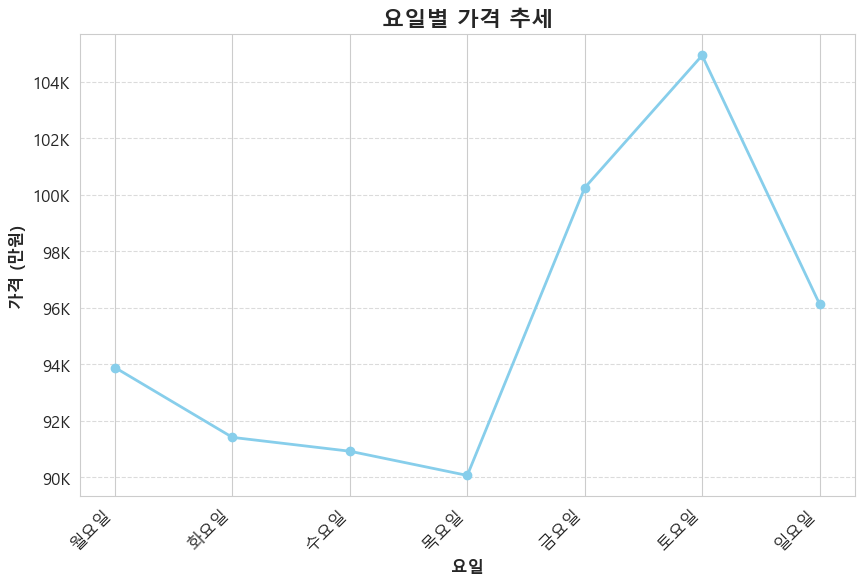

In [98]:
# 요일별 가격 추세
'''
요일별 가격이 평균적으로 어떻게 변동되는지 추세를 시각화하기 위해 요일별 가격을 평균으로 그룹화
시각화 결과를 봤을 때, 목요일이 최저가로 나타났으며, 금요일과 토요일엔 가격이 오르는 추세를 보여주었음
요일에 대한 정보도 가격을 예측하는데 중요한 요소로 판단하여 feature로 사용
'''
# 데이터를 그룹화
price_by_weekday = preprocessed_data.groupby('요일')['가격'].mean()

# 요일 이름 변경
weekday_names = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
price_by_weekday.index = weekday_names

# 요일별 가격 추세 꺾은선 그래프 시각화
plt.figure(figsize=(10, 6))
price_by_weekday.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)

# y축 눈금 레이블 백만원 단위로 표시하는 함수 정의
def format_func(value, tick_number):
    return f"{int(value / 1e4)}K"

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.title('요일별 가격 추세', fontsize=16, weight='bold')
plt.xlabel('요일', fontsize=12, weight='bold')
plt.ylabel('가격 (만원)', fontsize=12, weight='bold')
plt.xticks(range(len(weekday_names)), weekday_names, fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

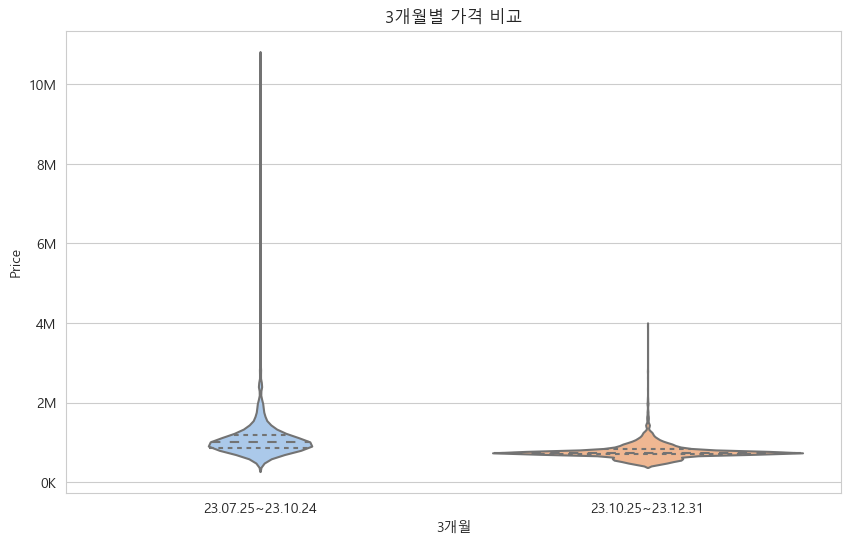

In [126]:
# 3개월별 가격 비교
'''
항공권을 저렴하게 구하려면 3개월 이전에 여행을 계획하고 티켓을 구매하라는 말을 자주 들었는데,
현재 시점으로 3개월 후와 전으로 데이터를 분류하여 가격에 차이가 있는지 확인하고자 했다.
시각화했을 때, 이상치 존재하여 제거 후 시각화 진행
'''
# 바이올린 플롯 그리기
plt.figure(figsize=(10, 6))
sns.violinplot(x='3개월', y='가격', data=preprocessed_data, inner='quartile', palette='pastel')

# y축 눈금에 백만원 단위로 표시 적용
def format_func(value, tick_number):
    if value >= 1e6:
        return f"{int(value / 1e6)}M"
    else:
        return f"{int(value / 1e4)}K"

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.xlabel('3개월')
plt.ylabel('Price')
plt.title('3개월별 가격 비교')
plt.xticks([0, 1], ['23.07.25~23.10.24', '23.10.25~23.12.31'])  # x축 레이블 설정
plt.show()

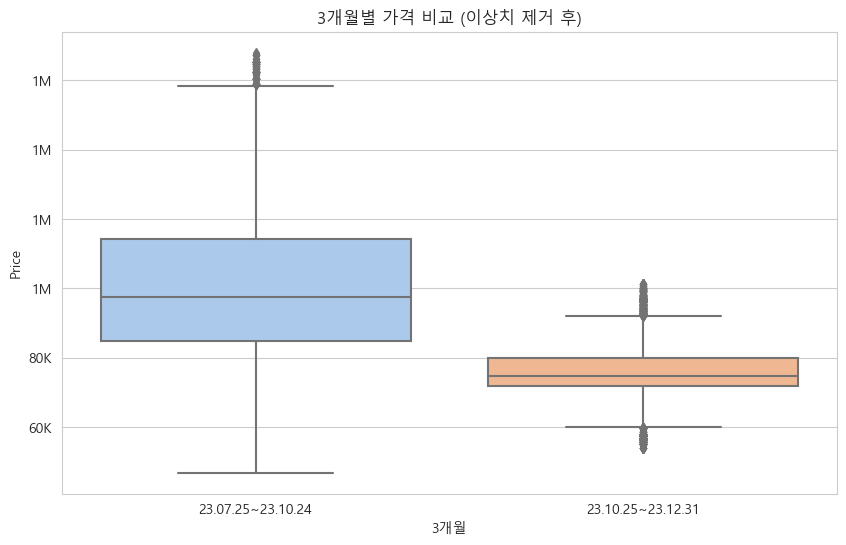

In [125]:
'''
이상치 제거 후 box plot 형태로 시각화 했을 때, 
3개월 이내에 여행하는 경우와 이후에 여행하는 경우 항공권 구매 비용에 차이 확인
해당 feature도 추가하여 모델 예측에 활용
'''
# 이상치를 확인하고 제거한 데이터
def remove_outliers(data, col_name, threshold=1.5):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return data[(data[col_name] >= lower_bound) & (data[col_name] <= upper_bound)]

# 이상치를 제거한 데이터 생성
preprocessed_data_no_outliers_NO = remove_outliers(preprocessed_data[preprocessed_data['3개월'] == 0], '가격')
preprocessed_data_no_outliers_YES = remove_outliers(preprocessed_data[preprocessed_data['3개월'] == 1], '가격')
preprocessed_data_no_outliers = pd.concat([preprocessed_data_no_outliers_NO,preprocessed_data_no_outliers_YES])

# 박스 플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='3개월', y='가격', data=preprocessed_data_no_outliers, palette='pastel')

# y축 눈금에 백만원 단위로 표시 적용
def format_func(value, tick_number):
    if value >= 1e6:
        return f"{int(value / 1e6)}M"
    else:
        return f"{int(value / 1e4)}K"

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))


plt.xlabel('3개월')
plt.ylabel('Price')
plt.title('3개월별 가격 비교 (이상치 제거 후)')
plt.xticks([0, 1], ['23.07.25~23.10.24', '23.10.25~23.12.31'])  # x축 레이블 설정
plt.show()

In [24]:
preprocessed_data['출발시간대'].value_counts()

오전2 (09:00 ~ 12:00)    2053
오후1 (12:00 ~ 15:00)    1845
저녁1 (18:00 ~ 21:00)    1769
오후2 (15:00 ~ 18:00)    1453
저녁2 (21:00 ~ 00:00)    1400
새벽 (00:00 ~ 06:00)      663
오전1 (06:00 ~ 09:00)     602
Name: 출발시간대, dtype: int64

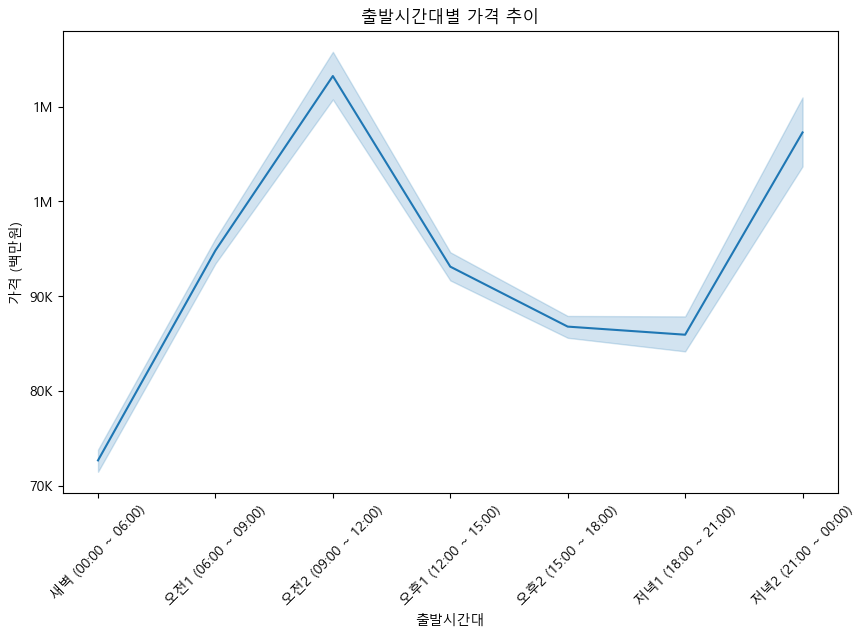

In [23]:
# 출발시간대별 가격 추이
'''
정확한 패턴은 파악할 수 없었지만, 오전(09:00 ~ 12:00)과 저녁(21:00 ~ 00:00) 두 타임이 가격이 높았음.
해당 정보 또한 feature로 추가해 모델 예측에 사용
'''
time_labels = ['새벽 (00:00 ~ 06:00)', '오전1 (06:00 ~ 09:00)', '오전2 (09:00 ~ 12:00)', '오후1 (12:00 ~ 15:00)', '오후2 (15:00 ~ 18:00)', '저녁1 (18:00 ~ 21:00)', '저녁2 (21:00 ~ 00:00)']
preprocessed_data['출발시간대'] = preprocessed_data['출발시간대'].replace({i: label for i, label in enumerate(time_labels)})

# 출발시간대를 카테고리 데이터로 변환
preprocessed_data['출발시간대'] = pd.Categorical(preprocessed_data['출발시간대'], categories=time_labels, ordered=True)

# 출발시간대별 가격 그래프를 꺾은선 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x='출발시간대', y='가격', data=preprocessed_data)
plt.xlabel('출발시간대')
plt.ylabel('가격 (백만원)')

# 백만원 단위로 표시하는 함수 정의
def format_func(value, tick_number):
    if value >= 1e6:
        return f"{int(value / 1e6)}M"
    else:
        return f"{int(value / 1e4)}K"

# y축 눈금에 백만원 단위로 표시 적용
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.title('출발시간대별 가격 추이')
plt.xticks(rotation=45)
plt.show()